In [ ]:
%pip install -U pip
%pip install pandas-datareader
%pip install matplotlib
%pip install plotly
%pip install numpy
%pip install pandas

In [37]:
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import plotly.graph_objects as go
import numpy as np
import math as mt
import pandas as pd

In [38]:
data = pdr.get_data_yahoo('TSLA', start='2016-01-01', end='2020-10-01')

In [39]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-25,408.730011,391.299988,393.470001,407.339996,67208500.0,407.339996
2020-09-28,428.079987,415.549988,424.619995,421.200012,49719600.0,421.200012
2020-09-29,428.500000,411.600006,416.000000,419.070007,50219300.0,419.070007
2020-09-30,433.929993,420.470001,421.320007,429.010010,48145600.0,429.010010
2020-10-01,448.880005,434.420013,440.760010,448.160004,50741500.0,448.160004


In [40]:
data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [66]:
fig = go.Figure(data=go.Ohlc(
    x=data.index,
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close'],
))
fig.show()

In [42]:
def crossover_sinal(data, curto=15, longo=50):
    data = data.dropna()
    # Média movel simples
    data[f'SMA{curto}'] = data['Close'].rolling(curto).mean()
    data[f'SMA{longo}'] = data['Close'].rolling(longo).mean()

    # Média movel exponencial
    data[f'EMA{curto}'] = data['Close'].ewm(span=curto).mean()
    data[f'EMA{longo}'] = data['Close'].ewm(span=longo).mean()


    data['Anterior'] = data[f'SMA{curto}'].shift(1) - data[f'SMA{longo}'].shift(1)
    data['Atual'] = data[f'SMA{curto}'] - data[f'SMA{longo}']

    data.loc[(data['Anterior']<0) & (data['Atual']>0), 'Compra'] = data['Close']
    data.loc[(data['Anterior']>0) & (data['Atual']<0), 'Venda'] = data['Close']

    data.loc[(data['Compra'].isna()),'Compra'] = 0
    data.loc[0,'Compra'] = np.NaN

    data.loc[(data['Venda'].isna()),'Venda'] = 0
    data.loc[0,'Venda'] = np.NaN

    columns = ['Close', f'SMA{curto}', f'SMA{longo}', f'EMA{curto}', f'EMA{longo}', 'Compra', 'Venda']
    return data[columns].dropna()

In [43]:
def calcula_MME(data, curto=15, longo=50):
    MME_curto = data['Close'].ewm(span=curto).mean()
    MME_longo = data['Close'].ewm(span=longo).mean()
    data['MACD'] = MME_curto - MME_longo
    data['sinal'] = data['MACD'].ewm(span=9).mean()
    return data

In [44]:
output_df = crossover_sinal(data)
output_df.tail()

,Close,SMA15,SMA50,EMA15,EMA50,Compra,Venda
Date,,,,,,,
2020-09-25 00:00:00,407.339996,405.646667,366.179679,410.274058,366.510611,0.0,0.0
2020-09-28 00:00:00,421.200012,405.838668,368.600319,411.639802,368.655294,0.0,0.0
2020-09-29 00:00:00,419.070007,411.762669,370.409719,412.568578,370.632341,0.0,0.0
2020-09-30 00:00:00,429.010010,415.944670,372.716479,414.623757,372.921662,0.0,0.0
2020-10-01 00:00:00,448.160004,421.066003,375.310359,418.815787,375.872185,0.0,0.0


In [45]:
start = pd.to_datetime("2019-01-01").date()
end = pd.to_datetime("2020-12-01").date()

In [46]:
filterted_data = output_df.copy()
filterted_data.index = [pd.Timestamp(i).date() for i in filterted_data.index]
a = (filterted_data.index >= start)&(filterted_data.index < end)
filterted_data = filterted_data.loc[a]

Text(0.5, 0, 'Data')

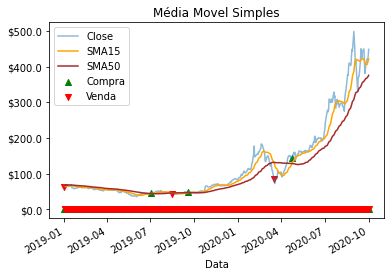

In [47]:
fig, ax = plt.subplots()
ax.plot(filterted_data.index, filterted_data['Close'], label='Close', alpha=0.5)
ax.plot(filterted_data.index, filterted_data['SMA15'], label='SMA15', color='orange')
ax.plot(filterted_data.index, filterted_data['SMA50'], label='SMA50', color='brown')

ax.scatter(filterted_data.index, filterted_data['Compra'], marker='^', label='Compra', color='green')
ax.scatter(filterted_data.index, filterted_data['Venda'], marker='v', label='Venda', color='red')

fig.autofmt_xdate()
ax.legend()

ax.yaxis.set_major_formatter('${x:}')
ax.set_title('Média Movel Simples')
ax.set_xlabel('Data')


Text(0.5, 0, 'Data')

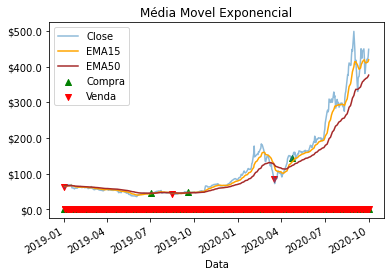

In [48]:
fig, ax = plt.subplots()
ax.plot(filterted_data.index, filterted_data['Close'], label='Close', alpha=0.5)
ax.plot(filterted_data.index, filterted_data['EMA15'], label='EMA15', color='orange')
ax.plot(filterted_data.index, filterted_data['EMA50'], label='EMA50', color='brown')

ax.scatter(filterted_data.index, filterted_data['Compra'], marker='^', label='Compra', color='green')
ax.scatter(filterted_data.index, filterted_data['Venda'], marker='v', label='Venda', color='red')

fig.autofmt_xdate()
ax.legend()

ax.yaxis.set_major_formatter('${x:}')
ax.set_title('Média Movel Exponencial')
ax.set_xlabel('Data')

In [49]:
filterted_data.tail()

,Close,SMA15,SMA50,EMA15,EMA50,Compra,Venda
2020-09-25,407.339996,405.646667,366.179679,410.274058,366.510611,0.0,0.0
2020-09-28,421.200012,405.838668,368.600319,411.639802,368.655294,0.0,0.0
2020-09-29,419.070007,411.762669,370.409719,412.568578,370.632341,0.0,0.0
2020-09-30,429.010010,415.944670,372.716479,414.623757,372.921662,0.0,0.0
2020-10-01,448.160004,421.066003,375.310359,418.815787,375.872185,0.0,0.0


### Calcular Variação do Valor do Dia Anterior

In [50]:
filterted_data['variacao'] = filterted_data['Close'] - filterted_data['Close'].shift(1)

In [51]:
filterted_data.tail()

,Close,SMA15,SMA50,EMA15,EMA50,Compra,Venda,variacao
2020-09-25,407.339996,405.646667,366.179679,410.274058,366.510611,0.0,0.0,19.549988
2020-09-28,421.200012,405.838668,368.600319,411.639802,368.655294,0.0,0.0,13.860016
2020-09-29,419.070007,411.762669,370.409719,412.568578,370.632341,0.0,0.0,-2.130005
2020-09-30,429.010010,415.944670,372.716479,414.623757,372.921662,0.0,0.0,9.940002
2020-10-01,448.160004,421.066003,375.310359,418.815787,375.872185,0.0,0.0,19.149994


### Identificar/Separar entre periodos de ganho e perda

In [52]:
#ganho
filterted_data['ganho'] = filterted_data.loc[filterted_data['variacao']>0,'variacao'].apply(abs)
filterted_data.loc[(filterted_data['ganho'].isna()),'ganho'] = 0
filterted_data.loc[0,'ganho'] = np.NaN

#perda
filterted_data['perda'] = filterted_data.loc[filterted_data['variacao']<0,'variacao'].apply(abs)
filterted_data.loc[(filterted_data['perda'].isna()),'perda'] = 0
filterted_data.loc[0,'perda'] = np.NaN

In [53]:
filterted_data.tail()

,Close,SMA15,SMA50,EMA15,EMA50,Compra,Venda,variacao,ganho,perda
2020-09-28,421.200012,405.838668,368.600319,411.639802,368.655294,0.0,0.0,13.860016,13.860016,0.000000
2020-09-29,419.070007,411.762669,370.409719,412.568578,370.632341,0.0,0.0,-2.130005,0.000000,2.130005
2020-09-30,429.010010,415.944670,372.716479,414.623757,372.921662,0.0,0.0,9.940002,9.940002,0.000000
2020-10-01,448.160004,421.066003,375.310359,418.815787,375.872185,0.0,0.0,19.149994,19.149994,0.000000
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calcular Média Movel (Ganhos e Perdas)

In [54]:
def crossover_avg(data, periodo=14):
    data[f'avg_ganho{periodo}'] = data['ganho'].rolling(periodo).mean()
    data[f'avg_perda{periodo}'] = data['perda'].rolling(periodo).mean()
    first = data[f'avg_ganho{periodo}'].first_valid_index()
    for index,row in data.iterrows():
        index = pd.Timestamp(index).date()
        if index == first:
            prev_avg_ganho = row[f'avg_ganho{periodo}']
            prev_avg_perda = row[f'avg_perda{periodo}']
        elif index > first:
            data.loc[index, f'avg_ganho{periodo}'] = ((prev_avg_ganho*(periodo-1)) + row['ganho'])/periodo
            prev_avg_ganho = data.loc[index, f'avg_ganho{periodo}']

            data.loc[index, f'avg_perda{periodo}'] = ((prev_avg_perda*(periodo-1)) + row['perda'])/periodo
            prev_avg_perda = data.loc[index, f'avg_perda{periodo}']
    return data.dropna()


In [55]:
filterted_data = crossover_avg(filterted_data)
filterted_data.tail()

,Close,SMA15,SMA50,EMA15,EMA50,Compra,Venda,variacao,ganho,perda,avg_ganho14,avg_perda14
2020-09-25,407.339996,405.646667,366.179679,410.274058,366.510611,0.0,0.0,19.549988,19.549988,0.000000,11.007678,10.365429
2020-09-28,421.200012,405.838668,368.600319,411.639802,368.655294,0.0,0.0,13.860016,13.860016,0.000000,11.211417,9.625041
2020-09-29,419.070007,411.762669,370.409719,412.568578,370.632341,0.0,0.0,-2.130005,0.000000,2.130005,10.410601,9.089682
2020-09-30,429.010010,415.944670,372.716479,414.623757,372.921662,0.0,0.0,9.940002,9.940002,0.000000,10.376987,8.440419
2020-10-01,448.160004,421.066003,375.310359,418.815787,375.872185,0.0,0.0,19.149994,19.149994,0.000000,11.003630,7.837531


### Calcular RS e RSI

In [56]:
def calculo_RS_RSI(data, periodo=14):
    data.tail()
    data[f'RS{periodo}'] = data[f'avg_ganho{periodo}']/data[f'avg_perda{periodo}']
    data[f'RSI{periodo}'] = 100 - (100/(1 + data[f'RS{periodo}']))
    return data.dropna()

In [57]:
filterted_data = calculo_RS_RSI(filterted_data)

In [58]:
filterted_data.tail()

,Close,SMA15,SMA50,EMA15,EMA50,Compra,Venda,variacao,ganho,perda,avg_ganho14,avg_perda14,RS14,RSI14
2020-09-25,407.339996,405.646667,366.179679,410.274058,366.510611,0.0,0.0,19.549988,19.549988,0.000000,11.007678,10.365429,1.061961,51.502471
2020-09-28,421.200012,405.838668,368.600319,411.639802,368.655294,0.0,0.0,13.860016,13.860016,0.000000,11.211417,9.625041,1.164818,53.806730
2020-09-29,419.070007,411.762669,370.409719,412.568578,370.632341,0.0,0.0,-2.130005,0.000000,2.130005,10.410601,9.089682,1.145321,53.386925
2020-09-30,429.010010,415.944670,372.716479,414.623757,372.921662,0.0,0.0,9.940002,9.940002,0.000000,10.376987,8.440419,1.229440,55.145684
2020-10-01,448.160004,421.066003,375.310359,418.815787,375.872185,0.0,0.0,19.149994,19.149994,0.000000,11.003630,7.837531,1.403966,58.402080


In [59]:
filterted_data[['RS14','RSI14']].tail()

,RS14,RSI14
2020-09-25,1.061961,51.502471
2020-09-28,1.164818,53.806730
2020-09-29,1.145321,53.386925
2020-09-30,1.229440,55.145684
2020-10-01,1.403966,58.402080


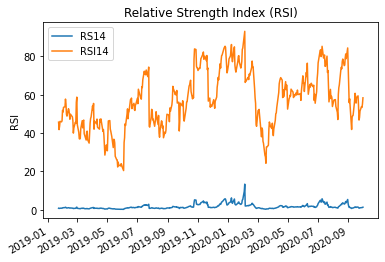

In [60]:
fig, ax = plt.subplots()

ax.plot(filterted_data.index,filterted_data['RS14'],label = 'RS14')
ax.plot(filterted_data.index,filterted_data['RSI14'],label = 'RSI14')

#formatar
ax.set_ylabel('RSI')
ax.set_title('Relative Strength Index (RSI)')
ax.legend()

fig.autofmt_xdate()

In [61]:
filterted_data.tail()

,Close,SMA15,SMA50,EMA15,EMA50,Compra,Venda,variacao,ganho,perda,avg_ganho14,avg_perda14,RS14,RSI14
2020-09-25,407.339996,405.646667,366.179679,410.274058,366.510611,0.0,0.0,19.549988,19.549988,0.000000,11.007678,10.365429,1.061961,51.502471
2020-09-28,421.200012,405.838668,368.600319,411.639802,368.655294,0.0,0.0,13.860016,13.860016,0.000000,11.211417,9.625041,1.164818,53.806730
2020-09-29,419.070007,411.762669,370.409719,412.568578,370.632341,0.0,0.0,-2.130005,0.000000,2.130005,10.410601,9.089682,1.145321,53.386925
2020-09-30,429.010010,415.944670,372.716479,414.623757,372.921662,0.0,0.0,9.940002,9.940002,0.000000,10.376987,8.440419,1.229440,55.145684
2020-10-01,448.160004,421.066003,375.310359,418.815787,375.872185,0.0,0.0,19.149994,19.149994,0.000000,11.003630,7.837531,1.403966,58.402080
